# 3.1. K-Mean-Clustering

>## <ins>Table of contents</ins>
>* [**3.1.1. Clusteranalyse und K-Means**](#3_1_1)
    * [**Wie funktioniert die K-Means-Clusteranalyse?**](#3_1_1_1)
>* [**3.1.2. Evaluation**](#3_1_2)
>* [**3.1.3. K-Means-Initialisierung**](#3_1_3)


#### `Links`
>- [K Means Clustering Algorithm](https://youtu.be/KzJORp8bgqs?si=yKp6XnLV8WJYNWxO)
>- [in diesem Notebook](./K-Mean_Algorithmus.ipynb)
>- [K Means Clustering Explained](https://youtu.be/4b5d3muPQmA?si=t8MlQn1g3dAT4jmQ)



## imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


centroids: 
[(1, 5), (4, 1), (8, 4)]
Iteration 0
centroids: 
[(2.6666666666666665, 5.666666666666667), (4.5, 3.0), (6.0, 5.0)]
   X  Y  Distanz_m0  Distanz_m1  Distanz_m2  Cluster
0  2  4    1.795055    2.692582    4.123106        0
1  2  6    0.745356    3.905125    4.123106        0
2  5  6    2.357023    3.041381    1.414214        2
3  4  7    1.885618    4.031129    2.828427        0
4  8  3    5.962848    3.500000    2.828427        2
5  6  6    3.349959    3.354102    1.000000        2
6  5  2    4.346135    1.118034    3.162278        1
7  5  7    2.687419    4.031129    2.236068        2
8  6  3    4.268749    1.500000    2.000000        1
9  4  4    2.134375    1.118034    2.236068        1
Iteration 1
centroids: 
[(2.6666666666666665, 5.666666666666667), (5.0, 3.0), (6.0, 5.5)]
   X  Y  Distanz_m0  Distanz_m1  Distanz_m2  Cluster
0  2  4    1.795055    3.162278    4.272002        0
1  2  6    0.745356    4.242641    4.031129        0
2  5  6    2.357023    3.000000    1.1180

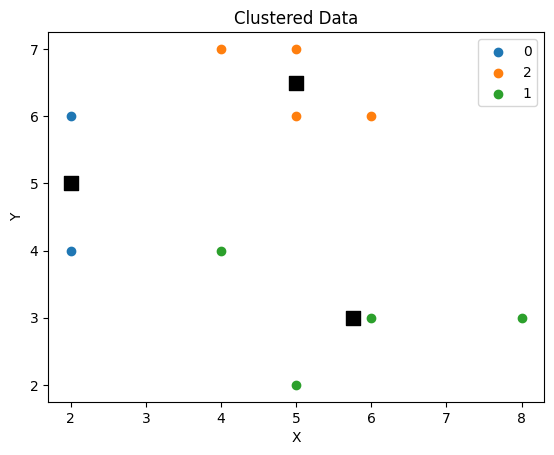

,X,Y,Distanz_m0,Distanz_m1,Distanz_m2,Cluster
0,2,4,1.000000,3.881044,3.905125,0
1,2,6,1.000000,4.802343,3.041381,0
2,5,6,3.162278,3.092329,0.500000,2
3,4,7,2.828427,4.366062,1.118034,2
4,8,3,6.324555,2.250000,4.609772,1
5,6,6,4.123106,3.010399,1.118034,2
6,5,2,4.242641,1.250000,4.500000,1
7,5,7,3.605551,4.069705,0.500000,2
8,6,3,4.472136,0.250000,3.640055,1
9,4,4,2.236068,2.015564,2.692582,1


In [8]:
# Define a function to calculate Euclidean distance
def euklidische_distanz(df, m):
    return np.sqrt((df.iloc[:, 0] - m[0])**2 + (df.iloc[:, 1] - m[1])**2)

def plot_clusters(df, centroids):
    # Plot the data points
    for i, cluster in enumerate(df['Cluster'].unique()):
        plt.scatter(df[df['Cluster'] == cluster].iloc[:, 0], df[df['Cluster'] == cluster].iloc[:, 1], label=cluster)

    # Plot the centroids
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], marker='s', s=100, linewidths=1, color='black')

    plt.title('Clustered Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Call the function to plot clusters and centroids

# Define a function to perform clustering
def clustering(df, centroids):
    print('centroids: ')
    print(centroids)
    liste_distanzen = []
    for i, m in enumerate(centroids):
        temp = 'Distanz_m'+str(i)
        df[temp] = euklidische_distanz(df, m)
        liste_distanzen.append(temp)
    df['Cluster'] = df[liste_distanzen].idxmin(axis=1)
    df['Cluster'] = df['Cluster'].map({'Distanz_m'+str(i): i for i in range(len(centroids))})

def K_Mean_clustering(df, centroids):
    # Perform initial clustering
    clustering(df, centroids)
    
    # Repeat clustering until centroids do not change significantly
    j = 0
    while True:
        print('Iteration '+str(j))
        j+=1
        new_centroids = [tuple(df[df['Cluster'] == i].iloc[:, :2].mean()) for i in range(len(centroids))]
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        clustering(df, centroids)
        print(df)

    plot_clusters(df, centroids)

    return df

# Define your data
data = {
    'X': [2, 2, 5, 4, 8, 6, 5, 5, 6, 4],
    'Y': [4, 6, 6, 7, 3, 6, 2, 7, 3, 4]
}
df = pd.DataFrame(data)

# Define k centroids
centroids = [(1, 5), (4, 1), (8, 4)]  # Add or remove centroids as needed

K_Mean_clustering(df, centroids)


## 3.1.1. Clusteranalyse und K-Means <a name="3_1_1"></a>

**1. Clusteranalyse**
   - `Ziel`: Partitionierung der Datenmenge $E = {x^{(1)}, ..., x^{(m)}}$ in Teilmengen $E_1,...,E_k$, so dass die Datenpunkte in jedem $E_i$ zueinander ähnlich sind $(i = 1,..., k)$, wohingegen die Datenpunkte in verschiedenen $E_i$, $E_j$ zueinander unähnlich sind $(i, j = 1,..., k, i ∕= j)$.
   - Die Datenpunkten in $E$ haben keine Klassifikation.
   - `Hauptaufgabe`: Finden einer Menge von Klassen und einer Zuordnung von Klassen zu Datenpunkten.

**Beispiel 1: Beispielsdatensatz $E_1$**

    x1   x2
0  2.0  3.0
1  4.0  4.2
2  2.8  2.1
3  1.9  2.0
4  4.1  3.2
5  3.5  3.5
6  3.8  4.1
7  2.0  1.9
8  2.9  3.1
9  4.0  3.9


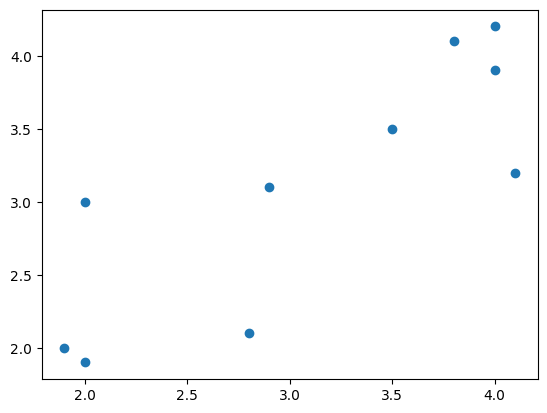

In [9]:
# Erstellen Sie den DataFrame
E_1 = pd.DataFrame({
    'x1': [2, 4, 2.8, 1.9, 4.1, 3.5, 3.8, 2, 2.9, 4],
    'x2': [3, 4.2, 2.1, 2, 3.2, 3.5, 4.1, 1.9, 3.1, 3.9]
})

# Ausgabe des DataFrames
print(E_1)

X = E_1.values
plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

### Wie funktioniert die K-Means-Clusteranalyse? <a name="3_1_1_1"></a>

Der **K-Means-Clustering** ist der klassische Algorithmus der Clusteranalyse, der konzeptuell dem KNN-Algorithmus für überwachtes Lernen ähnelt. Neben einem Datensatz `E` benötigt der Algorithmus die Spezifikation der Anzahl der Cluster `k`, die gelernt werden sollen.

Die Zeile `KMeans(n_clusters=3,n_init=10).fit(X)` führt eine K-Means-Clusteranalyse auf den Daten in `X` durch.

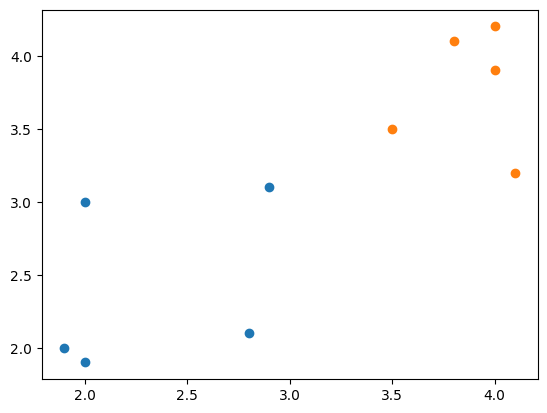

In [10]:
from sklearn.cluster import KMeans

clust = KMeans(n_clusters=2,n_init=10).fit(X)
y = clust.predict(X)

plt.figure()

plt.scatter(X[y==0].T[0], X[y==0].T[1])
plt.scatter(X[y==1].T[0], X[y==1].T[1])
#plt.scatter(X[y==2].T[0], X[y==2].T[1])

plt.show()

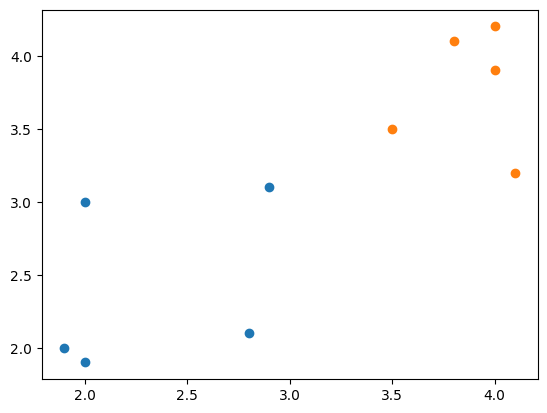

In [11]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

clust = KMeans(n_clusters=2,n_init=10).fit(X_scaled)
y = clust.predict(X_scaled)

plt.figure()

plt.scatter(X[y==0].T[0], X[y==0].T[1])
plt.scatter(X[y==1].T[0], X[y==1].T[1])
plt.scatter(X[y==2].T[0], X[y==2].T[1])

plt.show()

![image.png](./dataset/K-Means-Clusteranalyse2.PNG)

Hier ist, was jeder Teil tut:
- `KMeans(n_clusters=3,n_init=10)`: Dies instanziiert das KMeans-Objekt. `n_clusters=3` gibt an, dass der Algorithmus versuchen sollte, die Daten in drei Gruppen (oder "Cluster") zu teilen. `n_init=10` bedeutet, dass der K-Means-Algorithmus mit 10 verschiedenen zufälligen Initialisierungen ausgeführt wird, und die beste Lösung in Bezug auf die Intra-Cluster-Varianz wird ausgewählt.
- `.fit(X)`: Dies passt das Modell an die Daten `X`. Das heißt, es führt den eigentlichen K-Means-Algorithmus auf den Daten aus.

**Funktionsweise des K-Means-Clustering-Algorithmus**: 

**Eine ditaillierte Erklärung des Algorthmus ist [in diesem Notebook](./K-Mean_Algorithmus.ipynb) zu finden.**


Der *naive K-Means-Algorithmus* (auch Lloyds Algorithmus genannt) ist eine heuristische Methode, um `E` in `k` Cluster zu unterteilen, sodass die Summe der euklidischen Distanzen von jedem Datenpunkt zu dem Mittelpunkt des ihm zugewiesenen Clusters minimal ist. Der Algorithmus arbeitet iterativ.

1. **Anfang :** Der Algorithmus startet von einer gegebenen Menge von Clustermittelpunkten (auch Zentroiden genannt) ${m_1,...,m_k}$.

>**Auswahl der initialen Zentroiden**: Die initiale Wahl der Zentroiden kann sich stark auf das Endergebnis auswirken. Üblicherweise wählt man hier zufällig gleichverteilt `k` Elemente aus `E` als initiale Zentroiden aus und führt den Algorithmus wiederholt aus, um das bestmögliche Clustering zu erreichen. Man kann Zentroiden auch durch eine bestimmte Methode wie das K-Means++-Verfahren berechnen.

2. **Zuweisung :** Jedem Datenpunkt `x` in `E` wird der Zentroid $m_i$ (i = 1,..., k) zugewiesen, der ihm am nächsten ist (bezüglich der euklidischen Distanz).
3. **Aktualisierung :** Anschließend aktualisieren wir $m_i$ durch den Mittelwert aller $m_i$ zugewiesenen Datenpunkte (i = 1,..., k).
4. **Iteration :** Diese beiden Schritte 2 und 3 werden wiederholt, bis die Zentroiden konvergieren (die Zuordnung der Datenpunkte zu den Zentroiden stabil wird).

>Es ist wichtig zu beachten, dass K-Means ein heuristischer Algorithmus ist, der eine lokale Optimallösung findet. Daher können die Ergebnisse je nach den anfänglichen Schwerpunkten variieren. Aus diesem Grund wird der Algorithmus oft mit verschiedenen anfänglichen Schwerpunkten ausgeführt (wie durch `n_init` angegeben), und die Lösung mit der geringsten Intra-Cluster-Varianz wird ausgewählt.

In [12]:
E_1

,x1,x2
0,2.0,3.0
1,4.0,4.2
2,2.8,2.1
3,1.9,2.0
4,4.1,3.2
5,3.5,3.5
6,3.8,4.1
7,2.0,1.9
8,2.9,3.1
9,4.0,3.9


#### Beispiel 1.

Die gegebenen Informationen beziehen sich auf den K-Means-Algorithmus, eine Methode zur Clusteranalyse in der Datenanalyse. 

Der Datensatz `E_1` besteht aus 10 Punkten, die jeweils durch ein Paar von Koordinaten `(x1, x2)` repräsentiert werden.

1. **Wir wählen die k zufälligen Zentroiden und setzen diese in das multidimensionale Koordinatensystem:** Zentroiden sind die Mittelpunkte der Cluster. 
Für unser Beispiel wählen wir $ k = 2 $ d.h. zwei intitale Zentroiden $$m1 = x^{(4)} = (4.1,3.2)$$ und $$m2 = x^{(5)} = (3.5,3.5)$$.

2. **berechnen die Abstände jedes Beispiels (x,y) zu jedem Zentroid m.**
**Verzerrung dist**: Die Verzerrung ist ein Maß für die Gesamtstreuung der Datenpunkte um ihre jeweiligen Zentroiden. Sie wird berechnet als die Summe der quadrierten euklidischen Abstände jedes Datenpunkts von seinem zugeordneten Zentroiden.
Dazu verwenden wir die Euklidische Formel. Für ein Zenroidpunkt $m(x_1, y_1)$  und ein Beispiel $(x_2, y_2)$ 
$$Verzerrung = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }$$

Beispielsweise gilt für $x(6) = (3.8,4.1)^T$:
$$||x(6) - m1|| = ||(3.8,4.1)^T - (3.5,3.5)^T|| = ||(0.3,0.6)^T|| = \sqrt{0.3^2 + 0.6^2} \approx 0.671$$

$$||x(6) - m2|| = ||(3.8,4.1)^T - (4.1,3.2)^T|| = ||(-0.3,0.9)^T|| = \sqrt{(-0.3)^2 + 0.9^2} \approx 0.949$$


3. **Die Beispiele werden dem Zentroid (Cluster) zugeordnet, dem sie am nächsten sind.**
**Clustering-Funktion**: Die Clustering-Funktion  `clustering(x)` weist jedem Datenpunkt `x` in `E` einen Zentroiden `m` zu.
Wir berechnen für alle $$x \in E_1$$ die Clusterzugehörigkeit. Somit wird $x(7)$ dem Cluster 1 bzw. dem Zentroiden $m_1$ zugewiesen. Insgesamt erhalten wir:
$$\text{cluster}(x) = 1 \longrightarrow x \in \{x(1), x(2), x(3), x(4), x(6), x(7), x(8), x(9)\}$$
$$\text{cluster}(x) = 2  \longrightarrow x \in \{x(5), x(10)\}$$

**4. Neue Zentroiden werden berechnet und in der Mitte des Clusters platziert.**

**Alternatives Clustering**: Ein alternatives Clustering wird vorgeschlagen, bei dem die Zentroiden `m1` und `m2` neuberechnet werden. Die Berechnung erfolgt mit einer Durschnittsberechnung von den x- und y-werten der Datenpunkte zugehörig zu jedem Cluster.

Wir berechnen die Zentroiden m1 und m2 neu:

m1 := $$\frac{1}{8}(x_1 + x_2 + x_3 + x_4 + x_6 + x_7 + x_8 + x_9) \approx (2.863, 2.988)^T$$

m2 := $$\frac{1}{2}(x_5 + x_{10}) = (4.05, 3.55)^T$$

Wir berechnen für alle $x \in E_1$ wieder die Clusterzugehörigkeit. Insgesamt erhalten wir

$$\text{cluster}(x) = 1 \longrightarrow x \in \{x_1, x_3, x_4, x_8, x_9\}$$

$$\text{cluster}(x) = 2 \longrightarrow x \in \{x_2, x_5, x_6, x_7, x_{10}\}$$


**5. Wir wiederholen die vorherigen schritte bis die Clusterzuordnung konvergiert ist.**
>konvegiert bedeutet dass die Clusterzuweisung ist identisch zu der Clusterzuweisung wie im Schritt zuvor.

  D.h. wir berechnen die Zentroiden m1 und m2 neu:

$$m_1 := \frac{1}{5}(x_1 + x_3 + x_4 + x_8 + x_9) = (2.32, 2.42)^T$$

$$m_2 := \frac{1}{5}(x_2 + x_5 + x_6 + x_7 + x_{10}) = (3.88, 3.78)^T$$
  und berechnen für alle $x \in E$ wieder die Clusterzugehörigkeit. Insgesamt erhalten wir

$$\text{cluster}(x) = 1 \longrightarrow x \in \{x_1, x_3, x_4, x_8, x_9\}$$

$$\text{cluster}(x) = 2 \longrightarrow x \in \{x_2, x_5, x_6, x_7, x_{10}\}$$

  und damit die identische Clusterzuweisung wie im Schritt zuvor. 

Die folgende Methode `K_Mean_clustering` zeigt die vorherigen Schritte und die Zwischenergebnisse in Detail.

centroids: 
[(3.5, 3.5), (4.1, 3.2)]
Iteration 0
centroids: 
[(2.988888888888889, 3.0888888888888886), (4.1, 3.2)]
    x1   x2  Distanz_m0  Distanz_m1  Cluster
0  2.0  3.0    0.992876    2.109502        0
1  4.0  4.2    1.502303    1.004988        1
2  2.8  2.1    1.006767    1.702939        0
3  1.9  2.0    1.539921    2.505993        0
4  4.1  3.2    1.116653    0.000000        1
5  3.5  3.5    0.655932    0.670820        0
6  3.8  4.1    1.296243    0.948683        1
7  2.0  1.9    1.546402    2.469818        0
8  2.9  3.1    0.089581    1.204159        0
9  4.0  3.9    1.296243    0.707107        1
Iteration 1
centroids: 
[(2.5166666666666666, 2.6), (3.9749999999999996, 3.85)]
    x1   x2  Distanz_m0  Distanz_m1  Cluster
0  2.0  3.0    0.653410    2.150145        0
1  4.0  4.2    2.181806    0.350892        1
2  2.8  2.1    0.574698    2.107872        0
3  1.9  2.0    0.860394    2.779951        0
4  4.1  3.2    1.693205    0.661910        1
5  3.5  3.5    1.333021    0.590021     

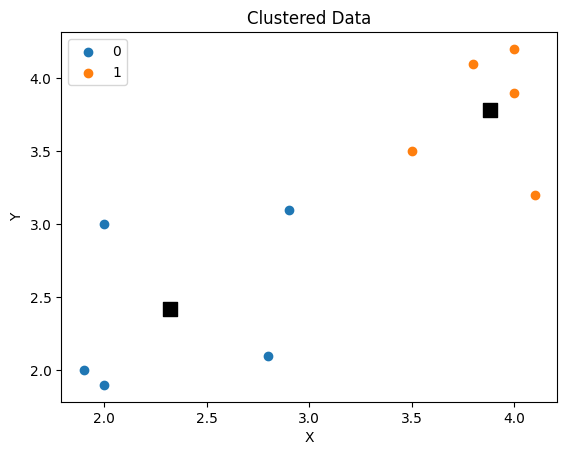

,x1,x2,Distanz_m0,Distanz_m1,Cluster
0,2.0,3.0,0.662420,2.035387,0
1,4.0,4.2,2.447611,0.436807,1
2,2.8,2.1,0.576888,1.997198,0
3,1.9,2.0,0.593970,2.662480,0
4,4.1,3.2,1.943399,0.620322,1
5,3.5,3.5,1.599625,0.472017,1
6,3.8,4.1,2.238928,0.329848,1
7,2.0,1.9,0.610574,2.658721,0
8,2.9,3.1,0.893756,1.192812,0
9,4.0,3.9,2.238928,0.169706,1


In [13]:
centroids = [(3.5,3.5), (4.1,3.2)]  # Add or remove centroids as needed

K_Mean_clustering(E_1, centroids)

Die folgende methode ist eine kompakte Lösung mithilfe der `KMean`-Methode der `sklearn`-Library.

    x1   x2
0  2.0  3.0
1  4.0  4.2
2  2.8  2.1
3  1.9  2.0
4  4.1  3.2
5  3.5  3.5
6  3.8  4.1
7  2.0  1.9
8  2.9  3.1
9  4.0  3.9
Zentroiden: 
 [[2.175      2.25      ]
 [3.71666667 3.66666667]]
Verzerrungswert: 
 3.4191666666666665


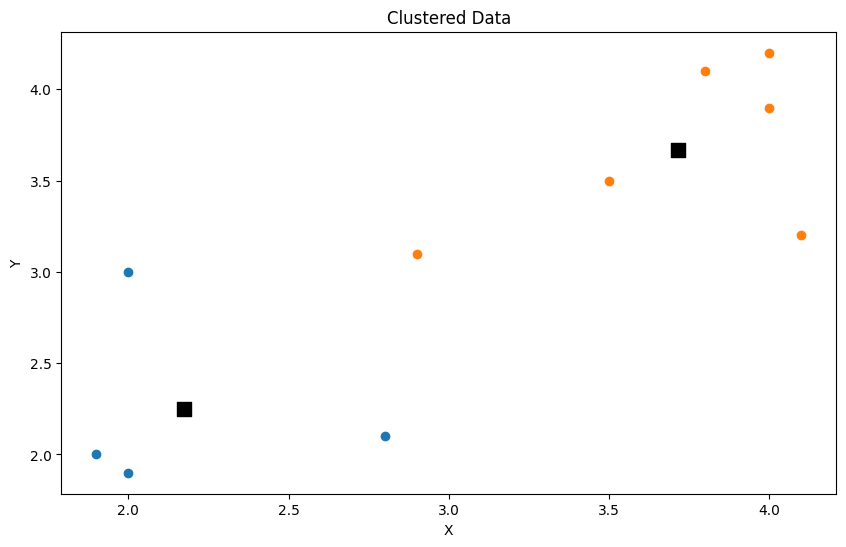

    x1   x2  Cluster
0  2.0  3.0        0
1  4.0  4.2        1
2  2.8  2.1        0
3  1.9  2.0        0
4  4.1  3.2        1
5  3.5  3.5        1
6  3.8  4.1        1
7  2.0  1.9        0
8  2.9  3.1        1
9  4.0  3.9        1


In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kompakte_K_Mean_clustering(df, n_clusters):
    X = df.values

    clust = KMeans(n_clusters=n_clusters, n_init=10).fit(X)
    y = clust.predict(X)

    # Assign the cluster labels to each data point
    df['Cluster'] = clust.labels_

    # Plot the data points with different colors for each cluster
    colors = ['red', 'green', 'blue']  # Add more colors if you have more than 3 clusters

    plt.figure(figsize=(10,6))
    for i in range(n_clusters):
        plt.scatter(df[df['Cluster']==i].iloc[:, 0], df[df['Cluster']==i].iloc[:, 1])

    # Get the coordinates of the cluster centers
    centroids = clust.cluster_centers_
    print('Zentroiden: \n',centroids)

    #Verzerrungswert
    print('Verzerrungswert: \n',clust.inertia_)

    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='s', s=100, linewidths=1, color='black', zorder=10)
    plt.title('Clustered Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    return df

# Erstellen Sie den DataFrame
E_1 = pd.DataFrame({
    'x1': [2, 4, 2.8, 1.9, 4.1, 3.5, 3.8, 2, 2.9, 4],
    'x2': [3, 4.2, 2.1, 2, 3.2, 3.5, 4.1, 1.9, 3.1, 3.9]
})

# Ausgabe des DataFrames
print(E_1)

# Call the function
clustered_E_1 = kompakte_K_Mean_clustering(E_1, 2)
print(clustered_E_1)


**Beispiel 2: Film-DVDs**
   - `Kontext`: Sie betreiben ein Geschäft und verkaufen Film-DVDs.
   - `Ziel`: Aufteilung der Filme auf drei Regale, sodass Filme gleichen Genres zusammenstehen
   - `Herausforderung`: Keine weiteren Informationen zu den Filmen außer Spielzeit und Filmkosten

Eine Ausführung des Algorithmus $\text{KMEANS(Emovies,3)}$ führt zu den Clustern wie in der folgenden  Abbildung dargestellt. 

Zentroiden: 
 [[ 95.5    23.875]
 [120.25  243.75 ]
 [127.    285.   ]]
Verzerrungswert: 
 3062.375


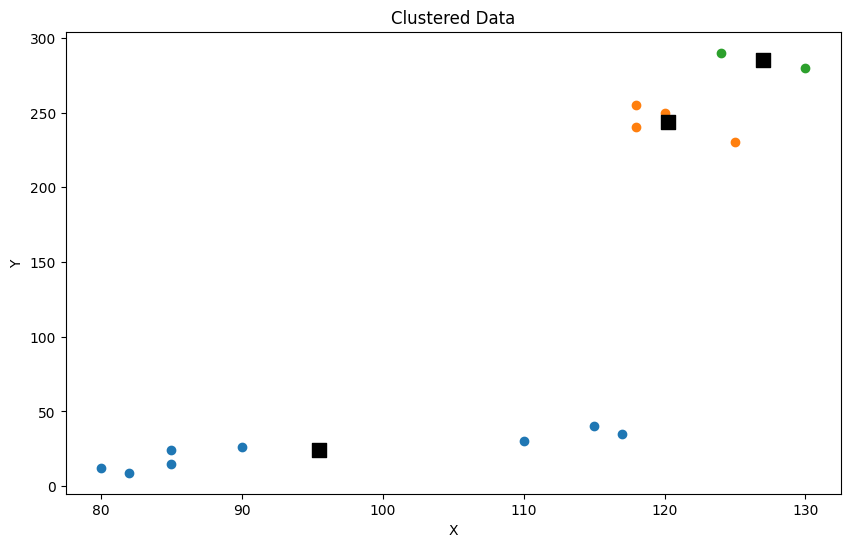

    length  costs  Cluster
0      120    250        1
1       80     12        0
2      125    230        1
3      115     40        0
4       85     24        0
5      118    255        1
6      117     35        0
7       82      9        0
8       85     15        0
9      130    280        2
10     124    290        2
11     110     30        0
12      90     26        0
13     118    240        1


In [15]:
# Call the function
E_movies = pd.read_csv("./dataset/dataset_movies2.csv")

clustered_E_movies = kompakte_K_Mean_clustering(E_movies, 3)
print(clustered_E_movies)

Dies entspricht nicht dem gewünschten Ergebnis. Insbesondere wurden alle Datenpunkte der beiden unteren Gruppen zu einem Cluster zusammengelegt. Das Problem liegt hier daran, dass das Merkmal Kosten auf einer größeren Skala (9–290 Mio. EUR) verteilt ist als das Merkmal Länge (80–130 Min.). Aus diesem Grund wirken sich Unterschiede im Merkmal Länge durch die Verwendung der euklidischen Distanz weniger signifikant aus als im Merkmal Kosten. 

In diesem Fall ist es sinnvoll, eine **Standardisierung**  der Daten zu machen: 

Sei $\hat{E}_{\text{movies}}$ der z-transformierte Datensatz zu $E_movies$. Eine Ausführung des Algorithmus $KMEANS(\hat{E}_{\text{movies}},3)$ führt zu den Clustern wie folgt dargestellt.

In [16]:
E_movies = pd.read_csv("./dataset/dataset_movies2.csv")

Zentroiden: 
 [[ 0.39365573 -0.76259217]
 [ 0.87659421  1.14388826]
 [-1.28810649 -0.91511061]]
Verzerrungswert: 
 0.8458496812125974


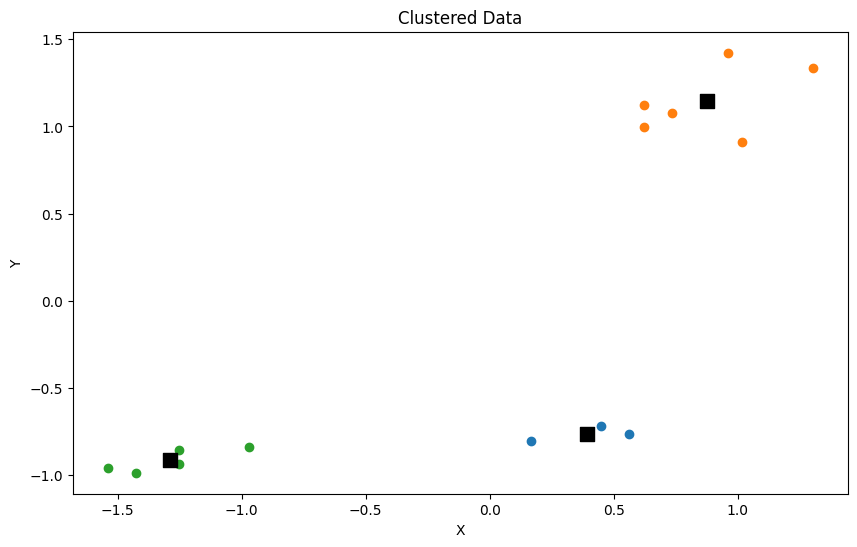

,length,costs,Cluster
0,0.734553,1.079625,1
1,-1.538098,-0.959667,2
2,1.018635,0.908256,1
3,0.450472,-0.719750,0
4,-1.254017,-0.856845,2
5,0.620921,1.122467,1
6,0.564105,-0.762592,0
7,-1.424466,-0.985372,2
8,-1.254017,-0.933961,2
9,1.302716,1.336678,1


In [35]:
from sklearn.preprocessing import StandardScaler
E_movies_scaled = StandardScaler().fit_transform(E_movies.values)
E_movies_scaled = pd.DataFrame(E_movies_scaled, columns=E_movies.columns)

kompakte_K_Mean_clustering(E_movies_scaled, 3)


>**Beispiel 3: Ringgrößen** (Beispiel aus Kapitel 2.1.)
>   - `Kontext`: Rolle eines Juweliers, der Ringe verkauft. Wir haben Daten über Körpergröße und Ringfingerumfang einiger Personen, aber anders als in Beispiel 1 von Unterkapitel 2.1 interpretieren wir den Ringfingerumfang nicht als Zielvariable, sondern als ein weiteres Merkmal.
>   - `Ziel`: den Kunden 2, 3 oder maximal 4 verschiedenen Standardgrößen für Ringe anbieten, und nicht alle möglichen Größen.
>   - `Fragestellung`:
>      - Bestimmung einer geeigneten Unterteilung der Ringgrößen
>      - Auf wie viele Standardgrößen kann man sich einschränken, sodass die Kunden immer noch "zufrieden" sind?

   Koerpergroesse  Ringfingerumfang
0           153.3              47.1
1           158.9              46.8
2           160.8              49.3
3           179.6              53.2
4           156.6              47.7
5           165.1              49.0
6           165.9              50.6
7           156.7              47.1
8           167.8              51.7
9           160.8              47.8
Zentroiden: 
 [[-0.51278852 -0.58099719]
 [ 1.19650654  1.3556601 ]]
Verzerrungswert: 
 5.98810477758334


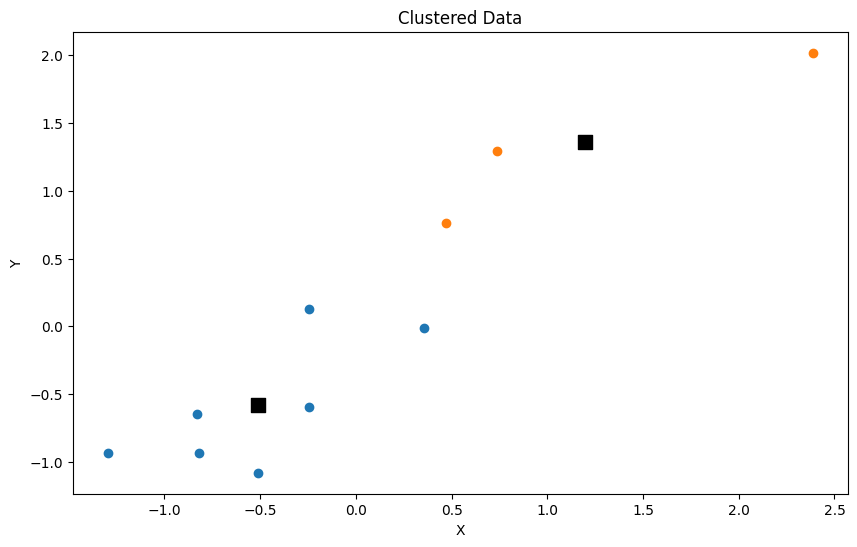

Zentroiden: 
 [[-0.51278852 -0.58099719  0.        ]
 [ 0.60175183  1.02520788  1.        ]
 [ 2.38601597  2.01656455  1.        ]]
Verzerrungswert: 
 3.2105137204183927


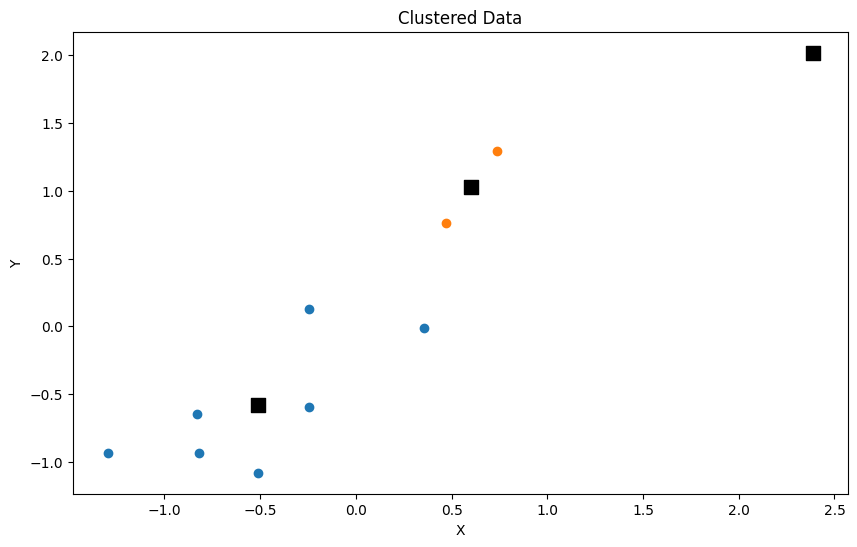

Zentroiden: 
 [[-0.86414361 -0.89705689  0.        ]
 [ 0.60175183  1.02520788  1.        ]
 [-0.04431506 -0.15958425  0.        ]
 [ 2.38601597  2.01656455  2.        ]]
Verzerrungswert: 
 1.1259684023077372


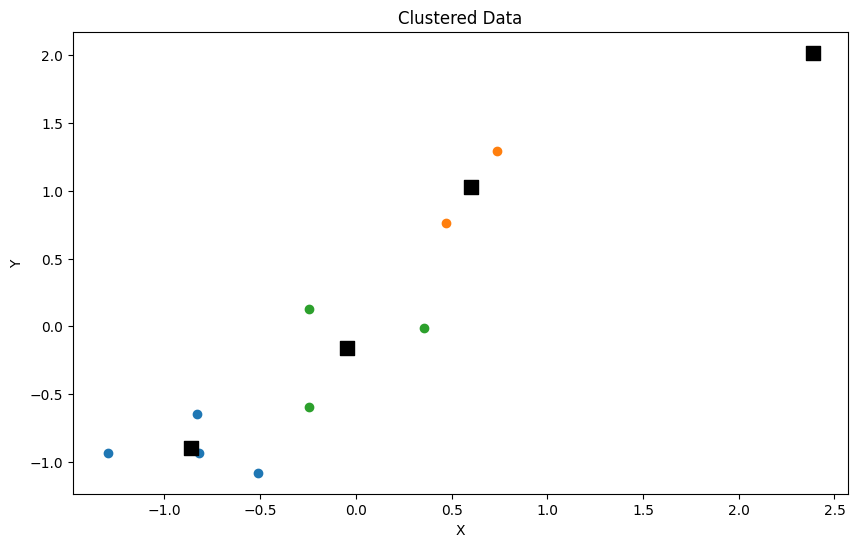

In [53]:
# Erstellen Sie den DataFrame
E_ring = pd.DataFrame({
        'Koerpergroesse': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
        'Ringfingerumfang': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
    })
    
# Ausgabe des DataFrames
print(E_ring)
E_ring_scaled = StandardScaler().fit_transform(E_ring.values)
E_ring_scaled = pd.DataFrame(E_ring_scaled, columns=E_ring.columns)

for i in range(2,5):
    kompakte_K_Mean_clustering(E_ring_scaled, i)


Bisher haben wir die euklidische Distanz in der aniven K-Means_Algorithmus verwendet. Dadurch ist der naive K-Means-Algorithmus sehr anfällig für unterschiedlich skalierte Merkmale wie in Beipiel 2 `E_movies`zu sehen. 

Außerdem haben wir bisher immer die Anzahl Clustern zufällig gewählt.
Um die optimale Anzahl von Clustern zu bestimmen, wird oft eine Methode wie die **Elbow-Methode** verwendet und der **Verzerrungsmaß**. Ein kleinerer Verzerrungswert bedeutet, dass die Punkte näher an ihren Clustern liegen, was im Allgemeinen besser ist. 

In [34]:
E_ring

,Koerpergroesse,Ringfingerumfang
0,153.3,47.1
1,158.9,46.8
2,160.8,49.3
3,179.6,53.2
4,156.6,47.7
5,165.1,49.0
6,165.9,50.6
7,156.7,47.1
8,167.8,51.7
9,160.8,47.8


## 3.1.2. Evaluation <a name="3_1_2"></a>

**Qualitätsbewertung von Modellen**: 
Sowohl beim überwachten als auch beim unüberwachten Lernen ist es wichtig, die Qualität des gelernten Modells zu bewerten und es mit anderen Modellen zu vergleichen. <ins>Dazu gibt es beim unüberwachten Lernen, und speziell bei Clusteringproblemen, prinzipiell zwei Möglichkeiten:</ins>

1. **Externe Evaluation**: Bei der externen Evaluation wird das Clustering auf einem zusätzlichen Testdatensatz evaluiert, der vollständige Beispiele (einschließlich der Klassenzugehörigkeit der Datenpunkte) enthalten muss. Dies kann aufwändig sein, da der Datensatz meist manuell annotiert werden muss. Wenn jedoch ein solcher Testdatensatz zur Verfügung steht, können dieselben Metriken zur Evaluation eingesetzt werden wie beim überwachten Lernen, z.B. Genauigkeitsmaß, Präzision, Sensitivität und das F1-Maß.

2. **Interne Evaluation**: Bei der internen Evaluation eines Clusteringalgorithmus wird das eigentliche Optimierungsziel des Clusterings als Kriterium herangezogen. Beim K-Means-Algorithmus versucht man beispielsweise, Zentroiden $(m_1,...,m_k)$ zu finden, sodass die Distanzen aller Datenpunkte in $E$ minimal zu den ihnen zugewiesenen Zentroiden sind. Dies wird formal durch das **Verzerrungsmaß** (engl. distortion bzw. Inertia) modelliert.

   Die Verzerrung ist rechnerisch die Summe der quadrierten Distanzen der Datenpunkte zu ihrem nächstgelegenen Clusterzentrum. Formal sieht das wie folgt aus: $$\text{dist}(\text{cluster}, E, m_1,...,m_k) = \sum_{x \in E} ||x - m_{\text{cluster}(x)}||$$

>**Hinweis**
>
>Das direkte Lösen des zur Verzerrung zugehörigen Optimierungsproblems, d.h., das Finden von $\text{cluster}$ und $(m_1,...,m_k)$, so dass $\text{dist}(\text{cluster},E,m_1,...,m_k)$ minimal ist, ist rechnerisch sehr schwer (genauer: es ist ein NP-schweres Problem). Aus diesem Grund versucht der K-Means-Algorithmus auch nur eine Annäherung an das Optimum zu erreichen.



**Beispiel 4: Wir führen Beispiel 1 fort**

Für das finale Clustering von E1 mit
$$m1 = (2.32,2.42)$$
$$m2 = (3.88,3.78)$$

$$cluster(x) = 1 \longrightarrow x ∈ \{x(1), x(3), x(4), x(8), x(9)\}$$
$$cluster(x) = 2 \longrightarrow x ∈ \{x(2), x(5), x(6), x(7), x(10)\}$$

erhalten wir $dist(cluster,E1,m1,m2) =$
$$|x(1) −m1|+|x(2) −m2|+|x(3) −m1|+|x(4) −m1|+|x(5) −m2| + |x(6) −m2|+|x(7) −m2|+|x(8) −m1|+|x(9) −m1|+|x(10) −m2|$$
$$≈ 0.662+0.437+0.577+0.594+0.62+0.472+0.33+0.611+0.894+0.17 ≈ 5.367$$

Schauen wir uns zum Vergleich ein alternatives Clustering an, das definiert ist via
$$m1 = (2.4,2.4)$$
$$m2 = (3.2,3.2)$$

$$cluster(x) = 1 \longrightarrow x ∈ \{x(1), x(3), x(4), x(8)\}$$
$$cluster(x) = 2 \longrightarrow x ∈ \{x(2), x(5), x(6), x(7), x(9), x(10)\}
$$

In [19]:
E_1

,x1,x2,Cluster
0,2.0,3.0,0
1,4.0,4.2,1
2,2.8,2.1,0
3,1.9,2.0,0
4,4.1,3.2,1
5,3.5,3.5,1
6,3.8,4.1,1
7,2.0,1.9,0
8,2.9,3.1,1
9,4.0,3.9,1


    x1   x2
0  2.0  3.0
2  2.8  2.1
3  1.9  2.0
7  2.0  1.9
    x1   x2
1  4.0  4.2
4  4.1  3.2
5  3.5  3.5
6  3.8  4.1
8  2.9  3.1
9  4.0  3.9
Die Verzerrung beträgt:  5.665363128247017
centroids: 
[(2.32, 2.42), (3.88, 3.78)]
Iteration 0


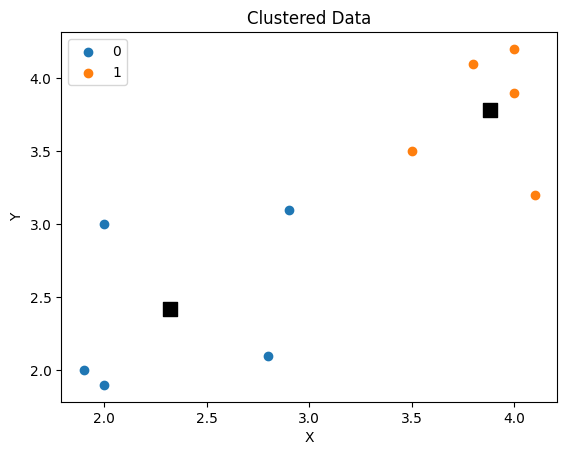

,x1,x2,Cluster,Distanz_m0,Distanz_m1
0,2.0,3.0,0,0.662420,2.035387
1,4.0,4.2,1,2.447611,0.436807
2,2.8,2.1,0,0.576888,1.997198
3,1.9,2.0,0,0.593970,2.662480
4,4.1,3.2,1,1.943399,0.620322
5,3.5,3.5,1,1.599625,0.472017
6,3.8,4.1,1,2.238928,0.329848
7,2.0,1.9,0,0.610574,2.658721
8,2.9,3.1,0,0.893756,1.192812
9,4.0,3.9,1,2.238928,0.169706


In [62]:
def calculate_verzerrung(df, centroids):
    verzerrung = 0
    for i, centroid in enumerate(centroids):
        cluster_points = df[df['Cluster'] == i].iloc[:, :2]
        print(cluster_points)
        for _, point in cluster_points.iterrows():
            verzerrung += np.linalg.norm(point - centroid)
    return verzerrung


centroids = [(2.32, 2.42), (3.88, 3.78)]


verzerrung = calculate_verzerrung(E_1, centroids)
print('Die Verzerrung beträgt: ', verzerrung)
K_Mean_clustering(E_1, centroids)



    x1   x2
0  2.0  3.0
2  2.8  2.1
3  1.9  2.0
7  2.0  1.9
8  2.9  3.1
    x1   x2
1  4.0  4.2
4  4.1  3.2
5  3.5  3.5
6  3.8  4.1
9  4.0  3.9
Die Verzerrung beträgt:  7.259999999999996
centroids: 
[(2.4, 2.4), (3.2, 3.2)]
Iteration 0
centroids: 
[(2.175, 2.25), (3.7166666666666663, 3.6666666666666665)]
    x1   x2  Cluster  Distanz_m0  Distanz_m1
0  2.0  3.0        0    0.770146    1.841572
1  4.0  4.2        1    2.670791    0.603922
2  2.8  2.1        0    0.642748    1.815137
3  1.9  2.0        0    0.371652    2.465371
4  4.1  3.2        1    2.146654    0.603922
5  3.5  3.5        1    1.821572    0.273354
6  3.8  4.1        1    2.462341    0.441273
7  2.0  1.9        0    0.391312    2.463342
8  2.9  3.1        1    1.117195    0.994010
9  4.0  3.9        1    2.460310    0.367045
Iteration 1


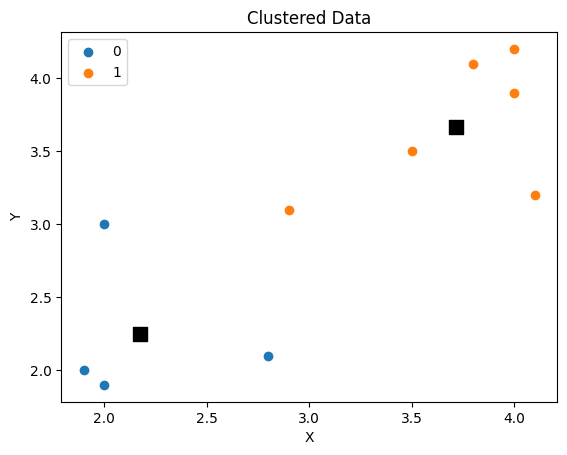

,x1,x2,Cluster,Distanz_m0,Distanz_m1
0,2.0,3.0,0,0.770146,1.841572
1,4.0,4.2,1,2.670791,0.603922
2,2.8,2.1,0,0.642748,1.815137
3,1.9,2.0,0,0.371652,2.465371
4,4.1,3.2,1,2.146654,0.603922
5,3.5,3.5,1,1.821572,0.273354
6,3.8,4.1,1,2.462341,0.441273
7,2.0,1.9,0,0.391312,2.463342
8,2.9,3.1,1,1.117195,0.994010
9,4.0,3.9,1,2.460310,0.367045


In [48]:
verzerrung = calculate_verzerrung(E_1, [(2.4, 2.4), (3.2, 3.2)])
print('Die Verzerrung beträgt: ', verzerrung)
K_Mean_clustering(E_1, [(2.4, 2.4), (3.2, 3.2)])


Es ist zu beobachten, dass der Wert der Verzerrung beim zweiten Clustering größer ist als beim ersten Clustering.

Vom Verzerrungswert eines Clusterings alleine lässt sich keine Aussage über die Güte des Clusterings ableiten, da er natürlich stark von der Skalierung der Merkmale abhängt. Erst im Vergleich mit den Verzerrungswerten anderer Clusterings können Güteunterschiede erkannt werden.

Denn je mehr Cluster ein Clustering besitzt, desto geringer ist üblicherweise die Verzerrung. Der Extremfall tritt hier ein, wenn ein Clustering k = m Cluster besitzt (d. h., ein Cluster pro Datenpunkt). In diesem Fall ist der Verzerrungswert gleich 0, das Clustering bringt aber keine richtigen Einblicke in die Struktur der Daten.
tenn

#### Ellenbogenmethode

Falls die korrekte Anzahl an Clustern k für einen Datensatz E nicht bekannt ist (wie in Beispiel 2), so kann der Verzerrungswert auch genutzt werden, um die geeignete Zahl der Cluster zu finden. Eine einfache Methode dazu ist die sogenannte **Ellenbogenmethode** (engl. elbow method). Dazu berechnet man die Verzerrungswerte für eine Reihe verschiedener Clusterzahlen k und stellt diese Werte in einem Diagramm dar. 

Die optimale Clusterzahl findet man dann bei dem k, an dessen Stelle die Kurve "abknickt". Die Interpretation dazu ist, dass hier höhere Clusterzahlen weniger Information enthalten als die Clusterzahl bis zu diesem Punkt. Natürlich ist dies nur eine sehr grobe Heuristik und der Wert ist auch nicht immer eindeutig.

**Wir führen Beispiel 3 fort.**

Die Verzerrungswerte der drei Clusterings zu $(k = 2,3,4)$ berechnen sich zu
`dist2`, `dist3`, `dist4` mit

`dist2` $( \approx 192.776)$

`dist3` $( \approx 53.702)$

`dist4` $( \approx 20.833)$

Die optimale Anzahl an Clustern scheint hier bei $(k = 3)$ zu liegen.


Verzerrungswert: zu k=1 ist 555.7859999999998
Verzerrungswert: zu k=2 ist 192.77583333333325
Verzerrungswert: zu k=3 ist 53.70166666666679
Verzerrungswert: zu k=4 ist 20.83333333333331
Verzerrungswert: zu k=5 ist 12.458333333333433


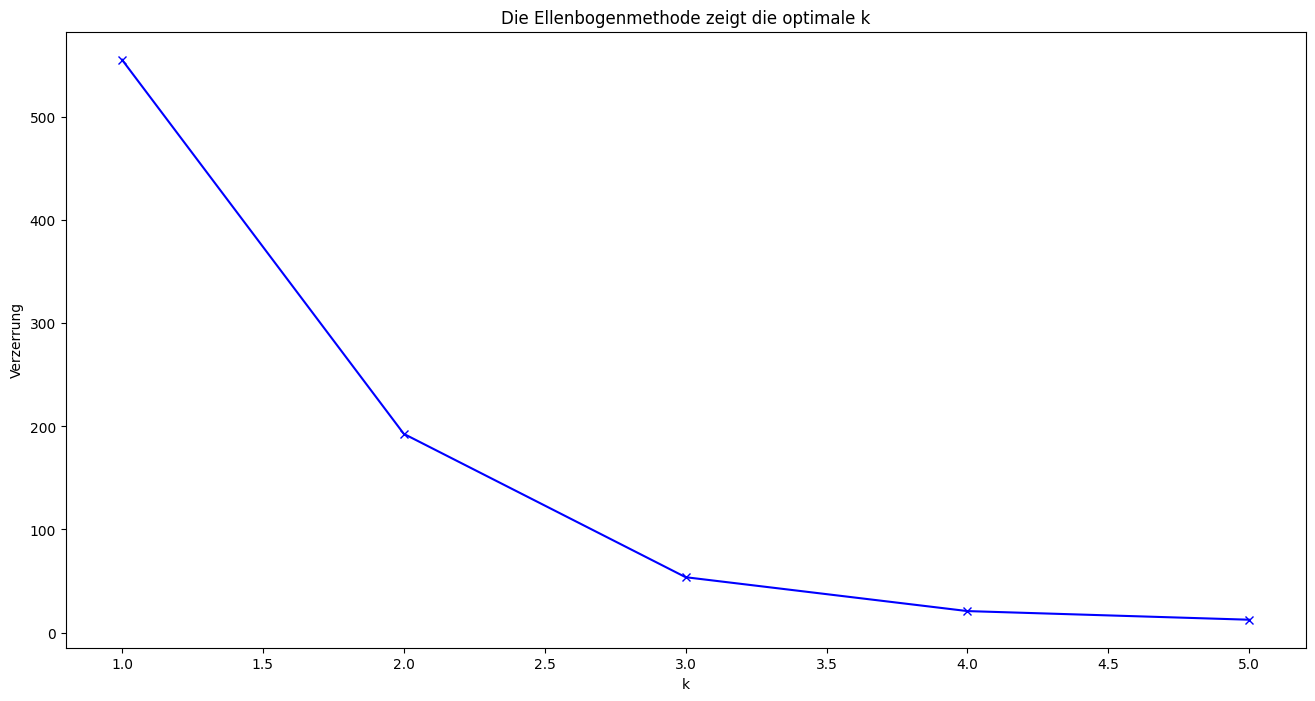

In [64]:
def Ellenbogenmethode(df, a, n):
    # Skalieren Sie die Daten
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)
    #df_scaled = StandardScaler().fit_transform(df.values)
    #df = pd.DataFrame(df_scaled, columns=df.columns)
    
    # Liste zur Speicherung der Verzerrungswerte
    verzerrung = []
    
    # Testen Sie verschiedene Werte von k
    K = range(a, n+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10).fit(df.values)
        verzerrung.append(kmeanModel.inertia_)
        print("Verzerrungswert: zu k="+str(k)+" ist "+str(kmeanModel.inertia_))
    
    # Zeichnen Sie die Verzerrungswerte
    plt.figure(figsize=(16,8))
    plt.plot(K, verzerrung, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Verzerrung')
    plt.title('Die Ellenbogenmethode zeigt die optimale k')
    plt.show()

Ellenbogenmethode(E_ring, 1, 5)

Verzerrungswert: zu k=1 ist 30.861349734401674
Verzerrungswert: zu k=2 ist 5.312939475873823
Verzerrungswert: zu k=3 ist 3.075379180345793
Verzerrungswert: zu k=4 ist 2.025964074467634
Verzerrungswert: zu k=5 ist 1.2342393990065335


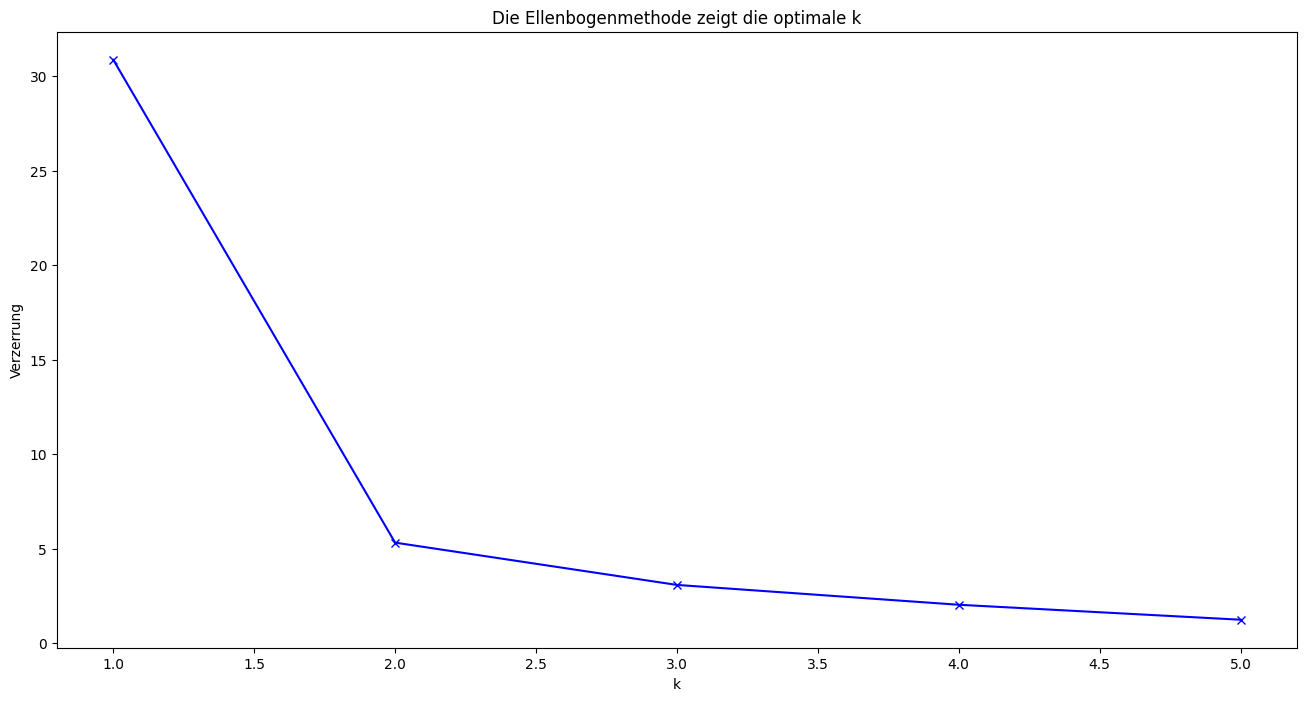

In [66]:
Ellenbogenmethode(E_1, 1, 5)

## 3.1.3. K-Means-Initialisierung <a name="3_1_3"></a>


Beispiel 8.

Die gegebenen Informationen beziehen sich auf den K-Means-Algorithmus, eine Methode zur Clusteranalyse in der Datenanalyse. 

1. **Datensatz E**: Der Datensatz `E_2` besteht aus 4 Punkten, die jeweils durch ein Paar von Koordinaten `(x1, x2)` repräsentiert werden.

2. **Zentroiden m1 und m2**: Zentroiden sind die Mittelpunkte der Cluster. In diesem Fall haben wir zwei Zentroiden `m1 = (6,1)` und `m2 = (6,2)`.

3. **Cluster-Funktion**: Die Cluster-Funktion weist jedem Datenpunkt `x` in `E` einen Zentroiden `mcluster(x)` zu. In diesem Fall werden die beiden unteren Punkte dem Cluster 1 (mit Zentroid `m1`) und die beiden oberen Punkte dem Cluster 2 (mit Zentroid `m2`) zugewiesen.

4. **Verzerrung dist**: Die Verzerrung ist ein Maß für die Gesamtstreuung der Datenpunkte um ihre jeweiligen Zentroiden. Sie wird berechnet als die Summe der quadrierten euklidischen Abstände jedes Datenpunkts von seinem zugeordneten Zentroiden. In diesem Fall beträgt die Verzerrung für das gegebene Clustering 16.

5. **Verschlechterung der Verzerrung**: Beachten Sie, dass wir diesen Wert beliebig verschlechtern können, indem wir beispielsweise die beiden rechten Punkte beliebig weiter nach rechts verschieben. Dies würde die Distanz dieser Punkte zu ihren Zentroiden erhöhen und somit die Gesamtverzerrung erhöhen.

Die Wahl des Clustering hängt von der spezifischen Anwendung ab, aber im Allgemeinen wird das Clustering mit der geringsten Verzerrung bevorzugt, da es die geringste Gesamtstreuung der Datenpunkte um ihre Zentroiden aufweist. 

Ich hoffe, das hilft! Lassen Sie mich wissen, wenn Sie weitere Fragen haben.

In [ ]:
E_2 = pd.DataFrame({
    'x1': [2, 2, 10, 10],
    'x2': [1, 2, 1, 2]
})

In [ ]:
Ellenbogenmethode(X, 2, 4)

Das folgende Beispiel ist ein klassisches Beispiel für eine der wichtigsten Anwendungsdomänen des Clusterings,h der* Marktsegmentierun*g.


In [ ]:
# Erstellen Sie den DataFrame
E_ring = pd.DataFrame({
    'Koerpergroesse': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'Ringfingerumfang': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
})

# Ausgabe des DataFrames
print(E_ring)
X = E_ring.values
X_scaled = StandardScaler().fit_transform(X)

plt.figure()
plt.scatter(X.T[0], X.T[1])
plt.show()

Die folgenden Abbildungen zeigen Clusterings für die Werte k = 2,3,4. 



 Zuerst werden Zentroiden der Anzahl k in der Regel zufällig ausgewählt
2. Diesege Zentroidwerden k in das multidimensionale Koordinatensystem gesetzt3
2. Dann werden die Abstände jeder Beobachtung zu jedem Schwerpunkt berechne4.
3. Die Beobachtungen werden dem Zentroid (Cluster) zugeordnet, dem sie am nächsten si5d.
4. Die Zentroide werden in der Mitte des Clusters platzi6rt.
5. Die Schritte 1 bis 4 werden wiederholt, bis es keine weitere Neuzuordnung von Beobachtungen zu Clustern gibt.

Es ist wichtig zu beachten, dass die Anzahl der Cluster k und damit die anfänglichen Zentroide a priori definiert werden müssen¹. Eine Methode zur Bestimmung der optimalen Anzahl von Clustern könnte das Ellenbogendiagramm sein, das die Varianz gegen die Anzahl der Cluster abbildet¹.

Bitte beachten Sie, dass die Wahl der Anfangszentren und die Anzahl der Cluster einen erheblichen Einfluss auf die Ergebnisse des K-Means-Algorithmus haen können³. Daher ist es oft sinnvoll, den Algorithmus mehrmals mit unterschiedlichen Anfangszentren auszuführen und die Ergebnisse zu verhmus-a-773713/.

In [ ]:
# Define a function to calculate Euclidean distance
def euklidische_distanz(df, m):
    return np.sqrt((df.iloc[:, 0] - m[0])**2 + (df.iloc[:, 1] - m[1])**2)

# Define a function to perform clustering
def clustering(df, centroids):
    print('centroids: ')
    print(centroids)
    liste_distanzen = []
    for i, m in enumerate(centroids):
        temp = 'Distanz_m'+str(i+1)
        df[temp] = euklidische_distanz(df, m)
        liste_distanzen.append(temp)
    df['Cluster'] = df[liste_distanzen].idxmin(axis=1)
    df['Cluster'] = df['Cluster'].map({'Distanz_m'+str(i+1): 'C'+str(i+1) for i in range(len(centroids))})

def K_Mean_clustering(df, centroids):
    # Perform initial clustering
    clustering(df, centroids)
    
    # Repeat clustering until centroids do not change significantly
    while True:
        new_centroids = [tuple(df[df['Cluster'] == 'C'+str(i+1)].iloc[:, :2].mean()) for i in range(len(centroids))]
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        clustering(df, centroids)
        print(df)
    return df

# Define your data
data = {
    'X': [2, 2, 5, 4, 8, 6, 5, 5, 6, 4],
    'Y': [4, 6, 6, 7, 3, 6, 2, 7, 3, 4]
}
df = pd.DataFrame(data)

# Define k centroids
centroids = [(1, 5), (4, 1), (8, 4)]  # Add or remove centroids as needed

K_Mean_clustering(df, centroids)
